<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Комнаты" data-toc-modified-id="Комнаты-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Комнаты</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li></ul></li><li><span><a href="#Время-продажи" data-toc-modified-id="Время-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи</a></span></li><li><span><a href="#Зависимость-стоимости-от-даты" data-toc-modified-id="Зависимость-стоимости-от-даты-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Зависимость стоимости от даты</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Удалонность-от-центра" data-toc-modified-id="Удалонность-от-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Удалонность от центра</a></span></li><li><span><a href="#Выборка-городов" data-toc-modified-id="Выборка-городов-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выборка городов</a></span></li><li><span><a href="#Анализ-квартир-в-центре" data-toc-modified-id="Анализ-квартир-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
import seaborn as sns

In [2]:
df.info()
display(df.head())
display(df.tail())
display(df.sample(5))
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8431,18,5999000.0,70.0,2018-07-02T00:00:00,3,2.50,9.0,43.0,6,NaN,...,8.0,NaN,Санкт-Петербург,49948.0,14779.0,1.0,503.0,0.0,NaN,93.0
7243,5,6500000.0,114.0,2017-12-07T00:00:00,3,2.65,5.0,93.6,5,NaN,...,9.5,1.0,Санкт-Петербург,18417.0,16432.0,2.0,671.0,1.0,969.0,NaN
12224,17,13990000.0,95.0,2017-06-16T00:00:00,2,NaN,5.0,44.0,3,NaN,...,21.0,NaN,Санкт-Петербург,22692.0,3341.0,1.0,862.0,1.0,284.0,NaN
22630,3,4939000.0,67.8,2016-04-27T00:00:00,2,NaN,24.0,31.1,11,NaN,...,14.7,0.0,Санкт-Петербург,21928.0,17256.0,0.0,NaN,1.0,429.0,147.0
21652,0,3000000.0,30.6,2017-02-13T00:00:00,1,2.50,4.0,17.3,2,NaN,...,5.3,0.0,Пушкин,14279.0,26433.0,0.0,NaN,0.0,NaN,171.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

исходя из данных полученных с помощью запроса info() видим, что  очень много значений пропущено. 
В задаче 

## Предобработка данных

Перевел тип данных в дататайм

Заменил поселок на посёлок, для исключения дубликатов и ...

In [3]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['balcony'] = df['balcony'].fillna(0)
s = df['studio'] == True  # Создал Series
df.loc[s, 'rooms'] = df.loc[s, 'rooms'].replace(0, 1)  # Заменил нулевые значения комнат в студиях на 1
df['is_apartment']=df['is_apartment'].fillna(False)
df['parks_around3000']=df['parks_around3000'].fillna(df['parks_around3000'].median()) # Заменил пропуски на медиану
df['parks_nearest']=df['parks_nearest'].fillna(df['parks_nearest'].median()) # Заменил пропуски на медиану
df['ponds_around3000']=df['ponds_around3000'].fillna(df['ponds_around3000'].median()) # Заменил пропуски на медиану
df['ponds_nearest']=df['ponds_nearest'].fillna(df['ponds_nearest'].median()) # Заменил пропуски на медиану
df['living_area'] = round(df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('mean')),1) # Заменил пропуски на среднее по количество комнат
df=df.query('locality_name.notnull()') # Удалил строки, где названия неопределены, таких всего 0.2 %
df['ceiling_height']= df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median')) # Заменил пропуск на медиану по городу
df['days_exposition']=df['days_exposition'].fillna((df['first_day_exposition'].max()-df['first_day_exposition']).dt.days) #Заменил пропуски на значение максимальной даты минус дата подачи начала объявления
df['kitchen_area']=df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('median')) # Заменил пропуски на медиану по общей площади
df['kitchen_area']=df['kitchen_area'].fillna(df.groupby('studio')['kitchen_area'].transform('mean'))# Заменил пропуски на медиану по общей площади 
df=df.query('floors_total.notnull()') #Удалил строки, где  не было значений в столбце floors_total
df['cityCenters_nearest']=round(df['cityCenters_nearest'].
                                fillna(df.groupby('locality_name')['cityCenters_nearest']
                                       .transform('median')),1) #Заменил пропуски на медиану по городу

ЧТо-то сделал

In [4]:
df['balcony'] = df['balcony'].astype('uint8')
df['rooms']=df['rooms'].astype('uint8')
df['floor']=df['floor'].astype('uint8')
df['total_area']=df['total_area'].astype('float16')
df['ceiling_height']=df['ceiling_height'].astype('float16')
df['floors_total']=df['floors_total'].astype('uint8')
df['living_area']=df['living_area'].astype('float16')
df['kitchen_area']=df['kitchen_area'].astype('float16')
df['total_images']=df['total_images'].astype('uint8')
df['airports_nearest']=df['airports_nearest'].astype('float32')
df['cityCenters_nearest']=df['cityCenters_nearest'].astype('float32')
df['parks_around3000']=df['parks_around3000'].astype('float32')
df['parks_nearest']=df['parks_nearest'].astype('float32')
df['ponds_around3000']=df['ponds_around3000'].astype('float32')
df['ponds_nearest']=df['ponds_nearest'].astype('float32')
df['days_exposition']=df['days_exposition'].astype('uint16')
df['last_price'] = df['last_price'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null uint8
last_price              23565 non-null int64
total_area              23565 non-null float16
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null uint8
ceiling_height          23445 non-null float16
floors_total            23565 non-null uint8
living_area             23565 non-null float16
floor                   23565 non-null uint8
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float16
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18041 non-null float32
cityCenters_nearest     18133 non-null float32
parks_around3000        23565 non-null float32
parks_nearest           23565 non-null float32
ponds_around3

In [5]:
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('деревня ','')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ','')
df['locality_name'] = df['locality_name'].str.replace('городской поселок ','')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок ','')
df['locality_name'] = df['locality_name'].str.replace('поселок ','')
df['locality_name'] = df['locality_name'].str.replace('село ','')
df['locality_name'] = df['locality_name'].str.replace('станции ','')
df.pivot_table(index='locality_name',values='cityCenters_nearest',aggfunc=['mean','max','min','median'])

,mean,max,min,median
,cityCenters_nearest,cityCenters_nearest,cityCenters_nearest,cityCenters_nearest
locality_name,,,,
Александровская,27468.000000,27584.0,27352.0,27468.0
Белоостров,38868.000000,38868.0,38868.0,38868.0
Зеленогорск,54617.582031,62706.0,51115.0,53381.0
Колпино,32113.488281,37477.0,29436.0,32018.0
Красное Село,30024.669922,41792.0,27317.0,29148.5
Кронштадт,49199.675781,51511.0,46657.0,49575.0
Левашово,25727.000000,25727.0,25727.0,25727.0
Лисий Нос,27613.333984,28246.0,26368.0,28226.0


## Расчёты и добавление результатов в таблицу

In [6]:
df['price_m2']= round(df['last_price'] / df['total_area']) # Посчитал цену за м2 и округлил до целочисленного значения
df['day']= df['first_day_exposition'].dt.day # Получил день публикации
df['month']= df['first_day_exposition'].dt.month # Получил месяц публикации
df['year']= df['first_day_exposition'].dt.year # Получил год публикации
def floor_stat(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
df['floor_level']= df.apply(floor_stat,axis=1) #Задал каждому этажу свою категорию
df['living_area_ratio'] = round(df['living_area'] / df['total_area'],2)
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'],2)
df=df.query('living_area_ratio <= 1.0')
df=df.query('kitchen_area_ratio <= 1.0')

## Исследовательский анализ данных

### Изучение параметров

####  Площадь

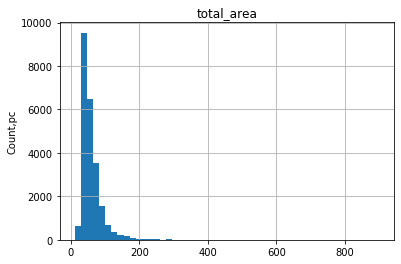

count    23531.0000
mean            inf
std             inf
min         12.0000
25%         40.0000
50%         52.0000
75%         69.6875
max        900.0000
Name: total_area, dtype: float64

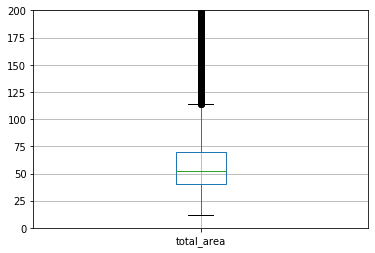

In [7]:
df['total_area'].hist(bins=50) #построил гистограмму по столбцу total_area
plt.title('total_area')
plt.ylabel('Count,pc')
plt.show() #вывел гистрограмму
display(df['total_area'].describe()) #Вывел характерные данные столбца total_area
df.boxplot(column=['total_area']) #Построил диаграму размаха
plt.ylim(0,200)
plt.show() #Вывел диаграмму размаха
df = df.query('total_area<113') #Убалил значения, где площадь выходила за границы диаграммы размаха


Все,что больше 113 м2 можно считать редкими значениями

#### Цена

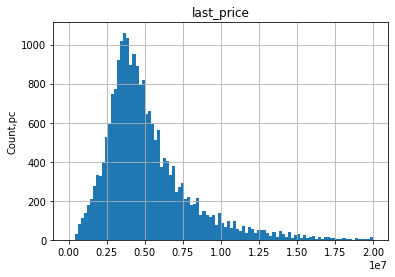

count    2.223100e+04
mean     5.276276e+06
std      3.311991e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.290000e+06
max      5.300000e+07
Name: last_price, dtype: float64


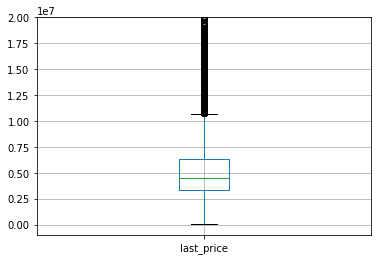

In [8]:
df['last_price'].hist(bins=100,range=(0,20000000))
plt.title('last_price')
plt.ylabel('Count,pc')
plt.show()
print(df['last_price'].describe())
df.boxplot(column=['last_price'])
plt.ylim(-1000000,20000000)
plt.show()
df=df.query('last_price < 10700000')



Всё, что больше 10,7 млн является выбросом

#### Комнаты

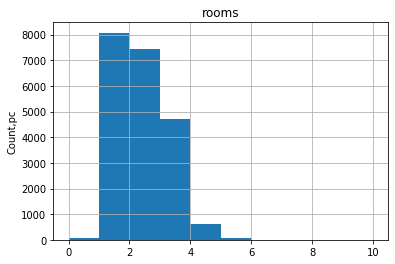

count    20944.000000
mean         1.902311
std          0.871272
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


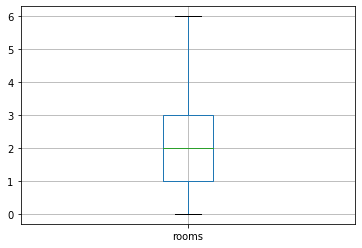

In [9]:
df['rooms'].hist(range=(0,10))
plt.title('rooms')
plt.ylabel('Count,pc')
plt.show()
print(df['rooms'].describe())
df.boxplot(column=['rooms'])
plt.show()
df=df.query('rooms<6')

#### Высота потолков

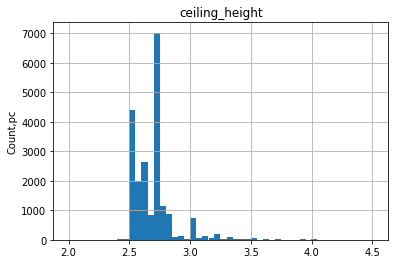

count    20820.000000
mean         2.703125
std          0.826660
min          1.000000
25%          2.550781
50%          2.699219
75%          2.699219
max         32.000000
Name: ceiling_height, dtype: float64


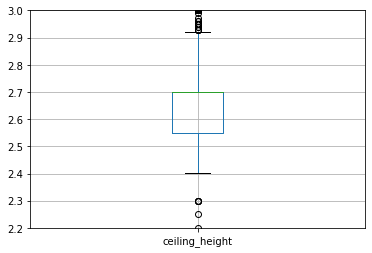

In [10]:
df['ceiling_height'].hist(bins=50,range=(2,4.5))
plt.title('ceiling_height')
plt.ylabel('Count,pc')
plt.show()
print(df['ceiling_height'].describe())
df.boxplot(column=['ceiling_height'])
plt.ylim(2.2,3)
plt.show()
df=df.query('2.3<ceiling_height<2.9')

Всё, что находится за пределами 2.3 и 2.9 являются выбросами

### Время продажи

In [11]:
df.query('days_exposition<100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_level,living_area_ratio,kitchen_area_ratio
1,7,3350000,40.40625,2018-12-04,1,2.630859,11,18.593750,1,False,...,0.0,502.0,81,82908.0,4,12,2018,Первый,0.459961,0.270020
5,10,2890000,30.40625,2018-09-10,1,2.599609,12,14.398438,5,False,...,1.0,502.0,55,95046.0,10,9,2018,Другой,0.469971,0.300049
7,5,7915000,71.62500,2019-04-18,2,2.699219,24,31.703125,22,False,...,0.0,502.0,15,110506.0,18,4,2019,Другой,0.439941,0.260010
11,9,3300000,44.00000,2018-08-27,2,2.550781,5,31.000000,4,False,...,0.0,502.0,7,75000.0,27,8,2018,Другой,0.700195,0.140015
12,10,3890000,54.00000,2016-06-30,2,2.599609,5,30.000000,5,False,...,1.0,502.0,90,72037.0,30,6,2016,Последний,0.560059,0.170044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23685,15,2490000,31.00000,2019-01-24,1,2.500000,5,17.296875,5,False,...,0.0,502.0,99,80323.0,24,1,2019,Последний,0.560059,0.180054
23687,6,3200000,39.00000,2017-12-16,1,2.699219,9,20.000000,6,False,...,0.0,502.0,38,82051.0,16,12,2017,Другой,0.509766,0.280029
23689,13,3550000,35.31250,2018-02-28,1,2.859375,15,16.296875,4,False,...,2.0,652.0,29,100531.0,28,2,2018,Другой,0.459961,0.260010
23690,3,5500000,52.00000,2018-07-19,2,2.699219,5,31.000000,2,False,...,0.0,502.0,15,105769.0,19,7,2018,Другой,0.600098,0.119995


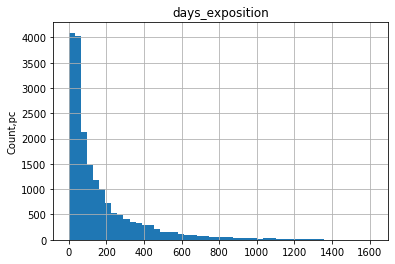

count    19062.000000
mean       168.077484
std        211.505696
min          0.000000
25%         40.000000
50%         85.000000
75%        211.000000
max       1618.000000
Name: days_exposition, dtype: float64

'Среднее время продажи: 168.1'

'Медиана времени продажи: 85.0'

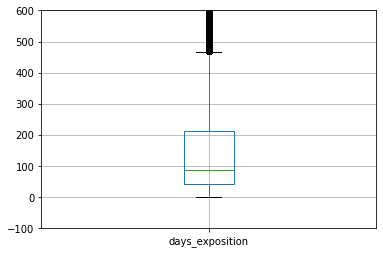

In [12]:
df['days_exposition'].hist(bins=50)
plt.title('days_exposition')
plt.ylabel('Count,pc')
plt.show()
display(df['days_exposition'].describe())
display('Среднее время продажи: {:.1f}'.format(df['days_exposition'].mean()))
display('Медиана времени продажи: {:.1f}'.format(df['days_exposition'].median()))
df.boxplot(column=['days_exposition'])
plt.ylim(-100,600)
plt.show()

Все, что меньше 40 дней можно считать очень быстрыми продажами, а все, что  выше 460 дней можно считать долгими продажами.

### Зависимость стоимости от даты

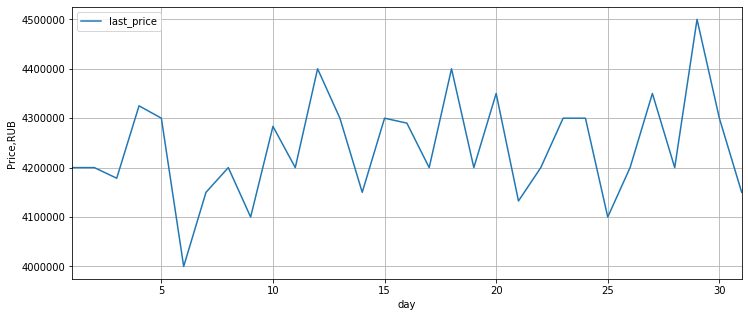

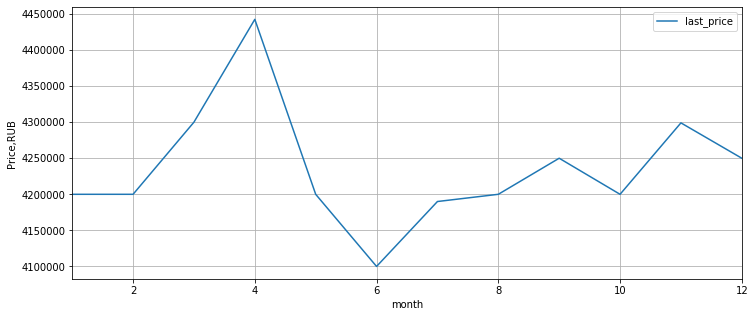

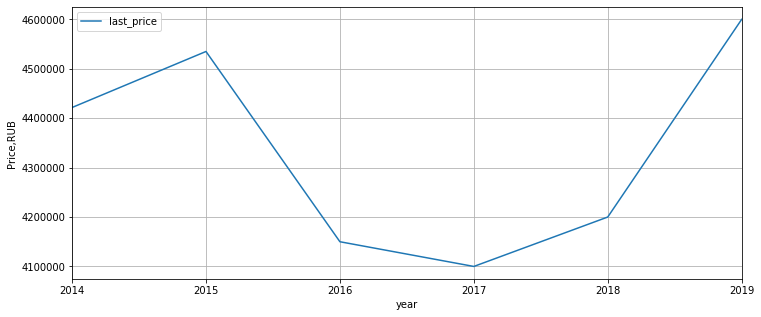

In [13]:
df.pivot_table(index='day',values='last_price',aggfunc='median').plot(grid=True,figsize=(12,5))
plt.ylabel('Price,RUB')
plt.show()
df.pivot_table(index='month',values='last_price',aggfunc='median').plot(grid=True,figsize=(12,5))
plt.ylabel('Price,RUB')
plt.show()
df.pivot_table(index='year',values='last_price',aggfunc='median').plot(grid=True,figsize=(12,5))
plt.ylabel('Price,RUB')
plt.show()

1. Два выбивающихся значения - это 6 и 29 число. Где самая низка и самая высокая цена соответственно
2. Небходимо отметить самую высокую ценю в апреле и самую низкую в июне.
3. Цена начинает падать после 2015 до 2017, затем начинает возрастать

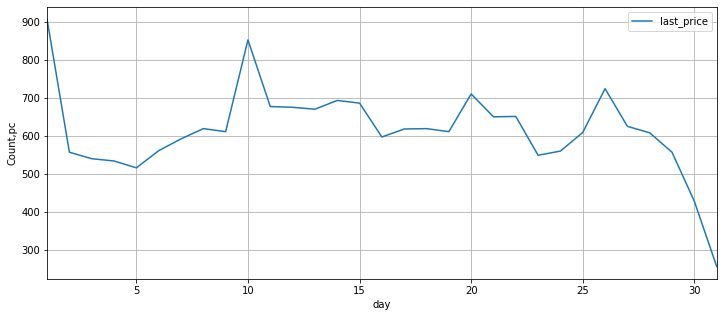

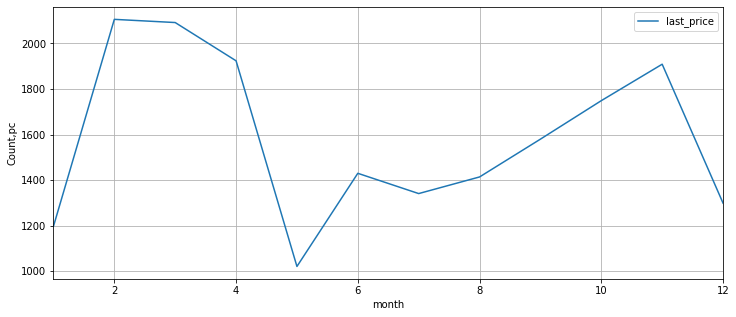

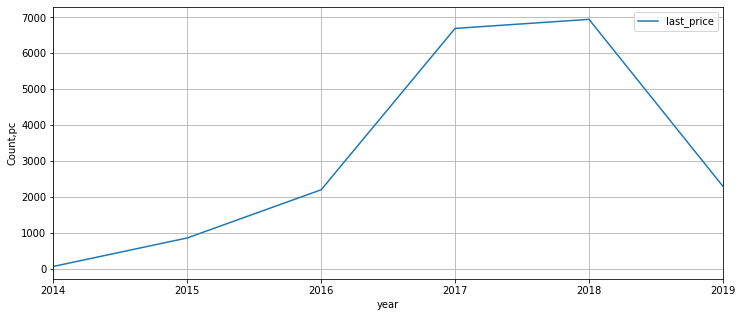

In [14]:
df.pivot_table(index='day',values='last_price',aggfunc='count').plot(grid=True,figsize=(12,5))
plt.ylabel('Count,pc')
plt.show()
df.pivot_table(index='month',values='last_price',aggfunc='count').plot(grid=True,figsize=(12,5))
plt.ylabel('Count,pc')
plt.show()
df.pivot_table(index='year',values='last_price',aggfunc='count').plot(grid=True,figsize=(12,5))
plt.ylabel('Count,pc')
plt.show()

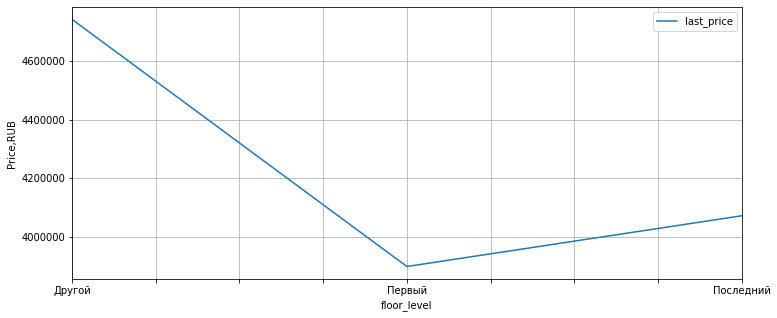

In [15]:
df.pivot_table(index='floor_level',values='last_price',aggfunc='mean').plot(grid=True,figsize=(12,5))
plt.ylabel('Price,RUB')
plt.show()

Стоимость на первой и последнем этаже примерно одинаковая

### Количество комнат

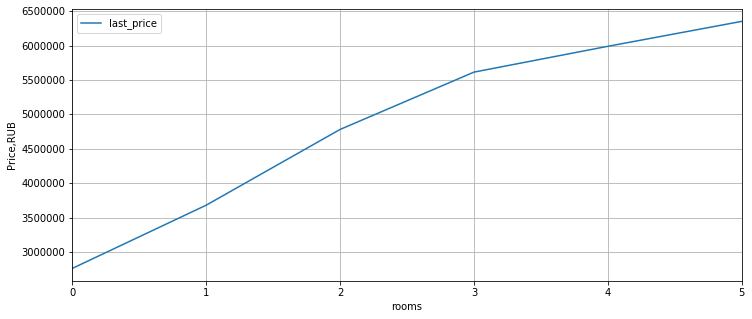

In [16]:
df.pivot_table(index='rooms',values='last_price',aggfunc='mean').plot(grid=True,figsize=(12,5))
plt.ylabel('Price,RUB')
plt.show()

Зависимость количества комнат от стоимости растет по экспоненте

### Удалонность от центра

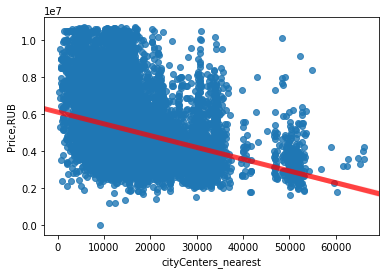

In [17]:
# (
#     df
#     .pivot_table(index='cityCenters_nearest',values='last_price',aggfunc='mean')
#     .plot(grid=True,figsize=(12,5))
# )
# plt.show()
sns.regplot(x=df["cityCenters_nearest"], y=df["last_price"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.ylabel('Price,RUB')
plt.show()

Цены падают при удалении от центра.
Так же важно отметить участки(видимо, там находятся ключевые населенные пункты) от 0 до 20к, от 20к до 35к и от 46к до 52к.

### Выборка городов

In [18]:
(
    df.pivot_table(index='locality_name',values=['price_m2','last_price'],
                   aggfunc={'price_m2' : 'mean', 'last_price' : 'count'}) #использовал столбец last_price для подсчета кол-ва объявлений
    .sort_values('last_price',ascending=False).head(10) # Вывел первых 10 городов с наибольшим количеством объявлений и среднуюю ценю м2
)

,last_price,price_m2
locality_name,,
Санкт-Петербург,11777,104124.168379
Мурино,579,86032.886010
Кудрово,463,95030.388769
Шушары,433,78502.782910
Всеволожск,377,66990.655172
Парголово,326,90332.812883
Колпино,316,75386.946203
Пушкин,302,99668.480132
Гатчина,283,68341.155477


Как и ожидалось, самая высокая средняя цена на м2 в Санкт-Петербурге

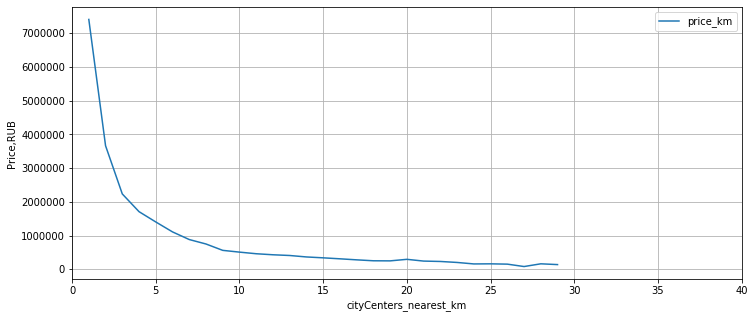

In [19]:
df['cityCenters_nearest_km']=round(df['cityCenters_nearest']/1000,0) # Перевел в километры
df['price_km']=round(df['last_price']/df['cityCenters_nearest_km'],0) #Стоимость одного километра 
(
    df.query('locality_name=="Санкт-Петербург"') #Фильтр по городу
    .pivot_table(index='cityCenters_nearest_km',values='price_km',aggfunc='mean') #Сводная таблица
    .plot(grid=True,figsize=(12,5),xlim=(0,40))
)
plt.ylabel('Price,RUB')
plt.show()

График сильно меняется в цене после 5 км - это и будем считать центром

### Анализ квартир в центре

count    458.000000
mean      63.093750
std       20.218750
min       12.000000
25%       47.000000
50%       62.000000
75%       77.234375
max      112.625000
Name: total_area, dtype: float64

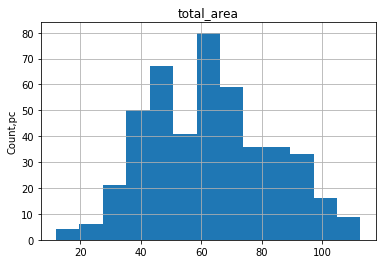

count    4.580000e+02
mean     6.949979e+06
std      1.877187e+06
min      2.100000e+06
25%      5.450000e+06
50%      6.900000e+06
75%      8.498750e+06
max      1.060000e+07
Name: last_price, dtype: float64

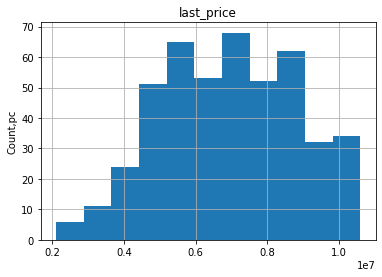

count    458.000000
mean       2.275109
std        0.889196
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64

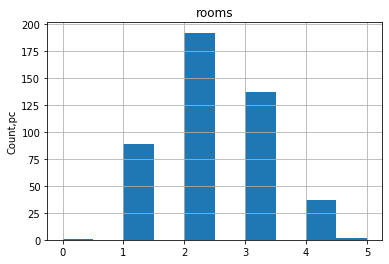

count    458.000000
mean       2.705078
std        0.067627
min        2.400391
25%        2.699219
50%        2.699219
75%        2.699219
max        2.880859
Name: ceiling_height, dtype: float64

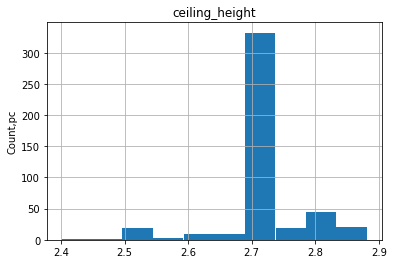

In [20]:
df_centre = df.query('cityCenters_nearest_km<5') #Создал новую dataframe только с расстоянием больше 10км
df_centre['total_area'].hist(bins='auto') #Построил гистограмму столбца total_area
display(df_centre['total_area'].describe()) #Вывел характерные данные столбца total_area
plt.title('total_area')
plt.ylabel('Count,pc')
plt.show()
df_centre['last_price'].hist(bins='auto') #Построил гистограмму столбца last_price
display(df_centre['last_price'].describe()) #Вывел характерные данные столбца last_price
plt.title('last_price')
plt.ylabel('Count,pc')
plt.show()
df_centre['rooms'].hist() #Построил гистограмму столбца rooms
display(df_centre['rooms'].describe()) #Вывел характерные данные столбца rooms
plt.title('rooms')
plt.ylabel('Count,pc')
plt.show()
df_centre['ceiling_height'].hist() #Построил гистограмму столбца ceiling_height
display(df_centre['ceiling_height'].describe()) #Вывел характерные данные столбца ceiling_height
plt.title('ceiling_height')
plt.ylabel('Count,pc')
plt.show()


1. Площадь. Чаще всего продают квартиры площадью около 60м2
2. Цена. Средняя стоимость квартир 6.9 и объявлений по ним больше всего
3. Число комнат. Чаще всего продают двухкомнатные квартиры
4. Высота потолков. Больше всего объявлений с высотой потолка - 2.7 метра

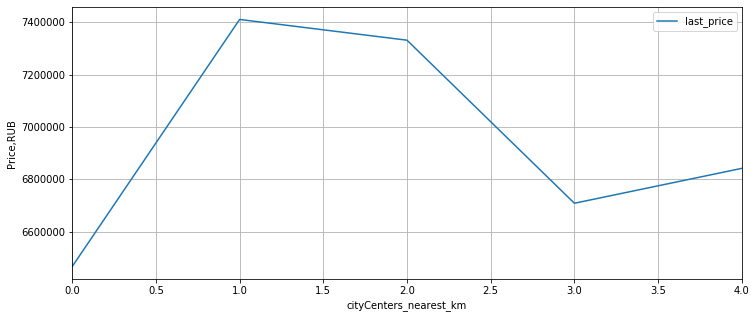

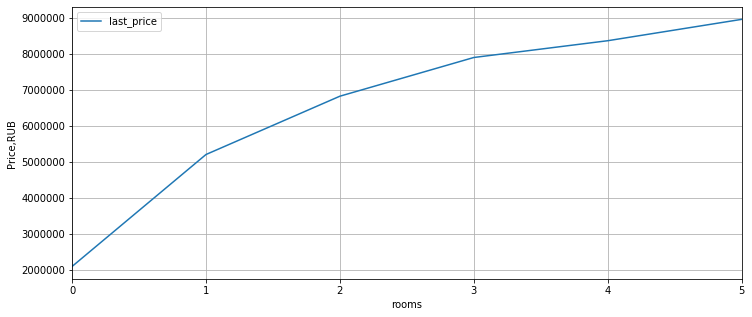

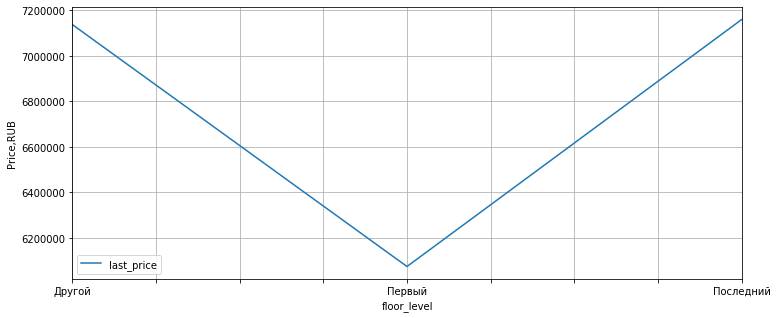

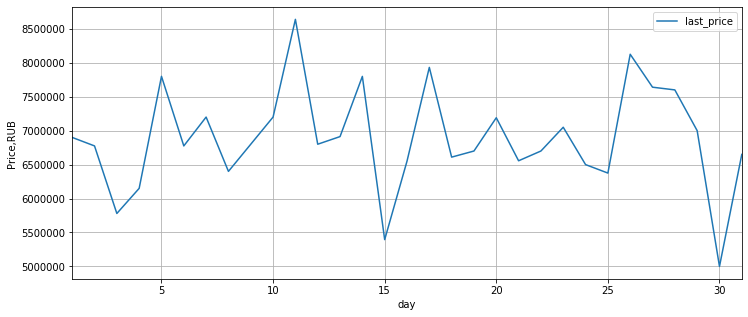

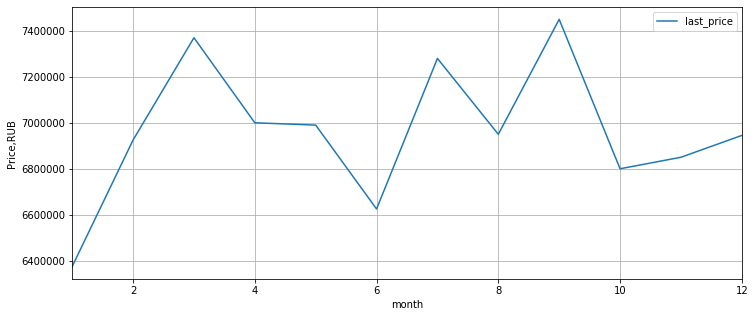

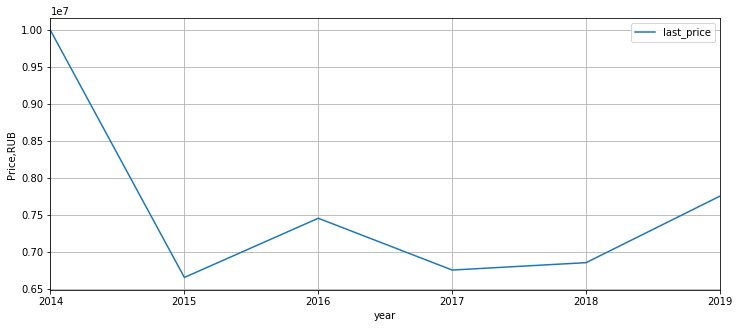

In [21]:
(
    df_centre
    .pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)  #Зависимость средней стоимости от удаленности от центра
plt.ylabel('Price,RUB')
plt.show()
(
    df_centre
    .pivot_table(index='rooms',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)# Зависимость средней стоимости от количества комнат
plt.ylabel('Price,RUB')
plt.show()
(
    df_centre
    .pivot_table(index='floor_level',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от этажа
plt.ylabel('Price,RUB')
plt.show()
(
    df_centre
    .pivot_table(index='day',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от дня
plt.ylabel('Price,RUB')

plt.show()
(
    df_centre
    .pivot_table(index='month',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от месяцм
plt.ylabel('Price,RUB')

plt.show()
(
    df_centre
    .pivot_table(index='year',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)
plt.ylabel('Price,RUB')
plt.show()
#Зависимость средней стоимости от года


1. Удаленность от центра. Цена растет до 1 км, потом начинает падать
2. Количество комнат. Количество комнат прямо влияют на стоимость жилья
3. Этаж. Самые дешевые квартиры на первой этаже
4. дороже всего квартиры продавались 11 числа
5. Дешевсе всего квартиры продавались в январе,а дороже всего в сентябре
6. После 2014 года квартиры стали дешеветь, дорожали в 2016 году и снова падали, до 2018 года

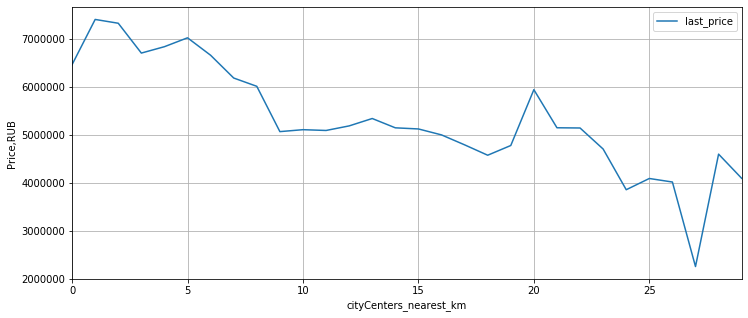

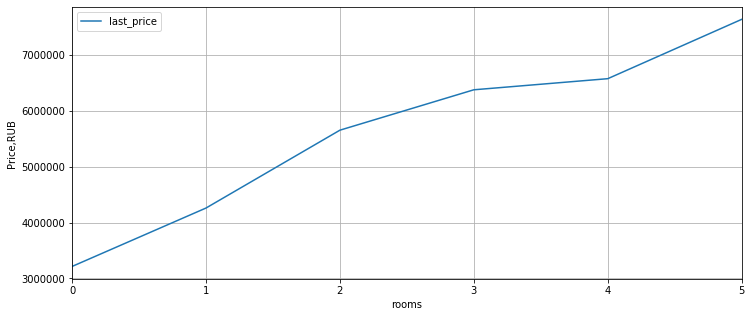

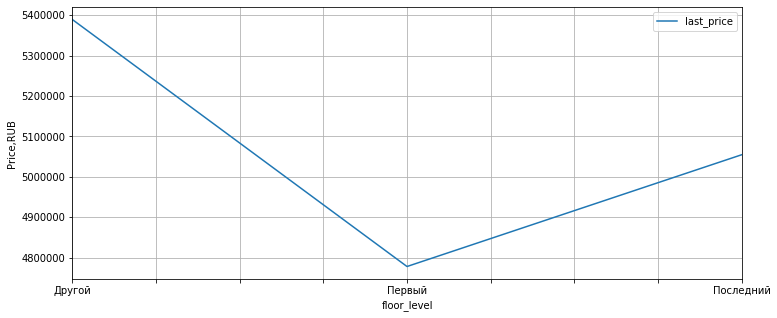

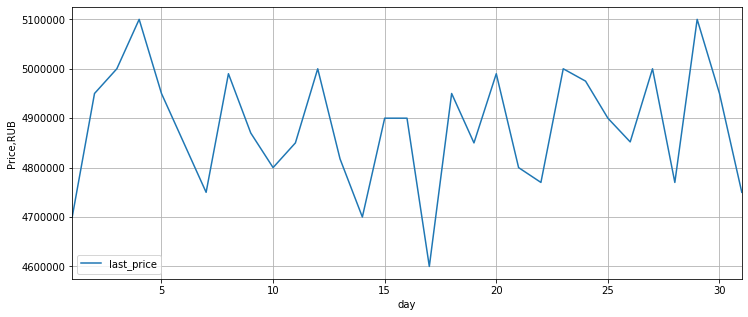

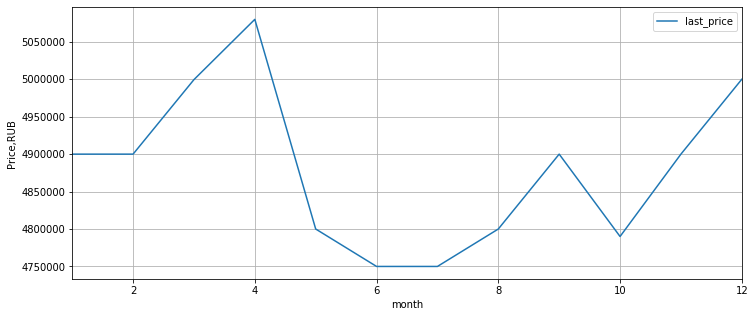

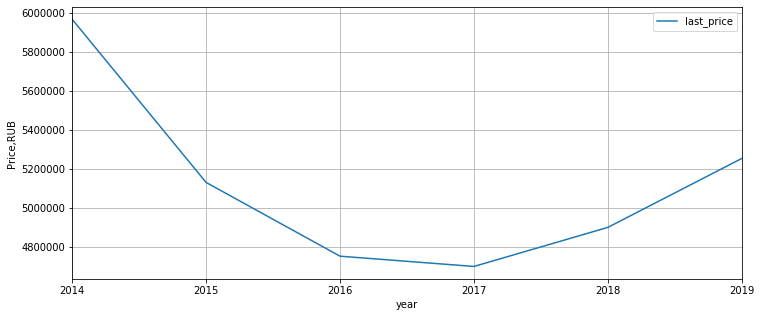

In [22]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
(
    df_spb
    .pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)  #Зависимость средней стоимости от удаленности от центра
plt.ylabel('Price,RUB')
plt.show()
(
    df_spb
    .pivot_table(index='rooms',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)# Зависимость средней стоимости от количества комнат
plt.ylabel('Price,RUB')
plt.show()
(
    df_spb
    .pivot_table(index='floor_level',values='last_price',aggfunc='mean')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от этажа
plt.ylabel('Price,RUB')
plt.show()
(
    df_spb
    .pivot_table(index='day',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от дня
plt.ylabel('Price,RUB')
plt.show()
(
    df_spb
    .pivot_table(index='month',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)#Зависимость средней стоимости от месяцм
plt.ylabel('Price,RUB')
plt.show()
(
    df_spb
    .pivot_table(index='year',values='last_price',aggfunc='median')
    .plot(grid=True,figsize=(12,5))
)
plt.ylabel('Price,RUB')
plt.show()
#Зависимость средней стоимости от года


1. Удаленность от центра. Цена падает после 5 км
2. Количество комнат. Так же как и в центре стоимость квартиры увеличивается с количеством комнат
3. Этаж. Самые дешевые квартиры на первой этаже, но в центре квартиры на последнем этаже дороже
4. По сравнению с цетром 16 числа квартиры продавались по меньшей цене
5. По сравнению с центром, дешевле всего были в июне и июле, а дороже всего в апреле
6. После 2014 года квартиры стали дешеветь, но по сравнению с центром, дорожать начали только после 2017 года.

## Общий вывод

count    11777.000000
mean         0.191406
std          0.069946
min          0.040009
25%          0.140015
50%          0.180054
75%          0.239990
max          0.870117
Name: kitchen_area_ratio, dtype: float64

count    11777.000000
mean         0.562988
std          0.105408
min          0.070007
25%          0.500000
50%          0.560059
75%          0.640137
max          1.000000
Name: living_area_ratio, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,day,month,year,floor_level,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km,price_km
12691,1,3700000,24.203125,2017-11-10,0,2.699219,19,24.203125,13,False,...,74,152873.0,10,11,2017,Другой,1.0,0.429932,17.0,217647.0
17069,11,8000000,100.000000,2017-12-18,5,2.699219,25,100.000000,10,False,...,60,80000.0,18,12,2017,Другой,1.0,0.150024,14.0,571429.0


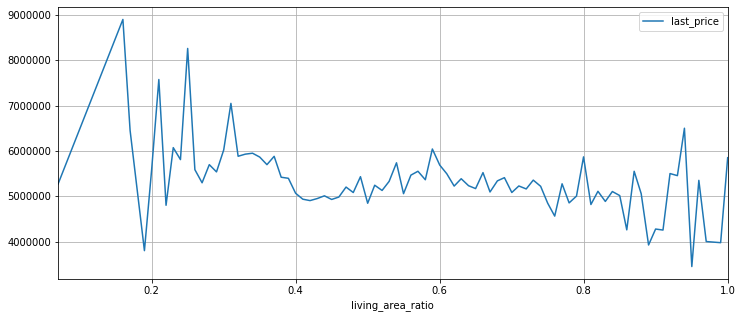

In [23]:
# (
#     df_spb
#     .pivot_table(index='total_area',values='last_price',aggfunc='median')
#     .plot(grid=True,figsize=(12,5))
# )
# plt.show()
#sns.regplot(x=df["total_area"], y=df["last_price"], line_kws={"color":"r","alpha":0.7,"lw":5})
#plt.show()
display(df_spb['kitchen_area_ratio'].describe())
display(df_spb['living_area_ratio'].describe())
df_spb.pivot_table(index='living_area_ratio',values='last_price',aggfunc='mean').plot(grid=True,figsize=(12,5))

Стоимость квартир напрямую зависит от расстояния до центра,количества комнат и от общей площади. Дешевле всего были квартиры на первом этаже. Больше всего объявлений было в Санкт-Петербурге, за его центральной частью.